In [2]:
# importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Online payment fraud detection dataset.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
data.shape

(6351193, 10)

In [6]:
# now finding if there is any missing value in data
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [8]:
data.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06
mean,2.425553e+02,1.798155e+05,8.347957e+05,8.561696e+05,1.101043e+06,1.225372e+06,1.215047e-03
std,1.410676e+02,6.036310e+05,2.889959e+06,2.926073e+06,3.398924e+06,3.674293e+06,3.483635e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.338829e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,7.486483e+04,1.415300e+04,0.000000e+00,1.330865e+05,2.149190e+05,0.000000e+00
75%,3.340000e+02,2.087152e+05,1.073460e+05,1.443651e+05,9.438661e+05,1.112791e+06,0.000000e+00
max,6.990000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [9]:
data["type"].value_counts()

type
CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: count, dtype: int64

In [ ]:
# Data Visualization

<Axes: xlabel='type', ylabel='count'>

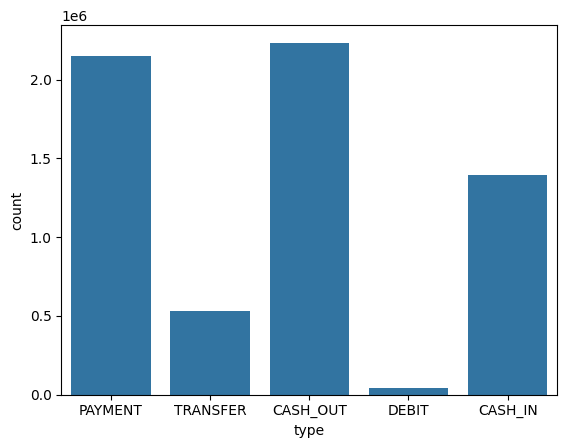

In [10]:
sns.countplot(x = "type", data = data)

<Axes: xlabel='type', ylabel='amount'>

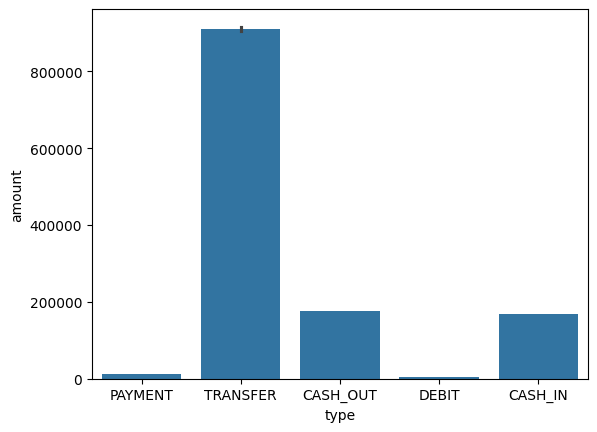

In [11]:
sns.barplot(x = "type", y = "amount", data = data)

In [12]:
data["isFraud"].value_counts()

isFraud
0    6343476
1       7717
Name: count, dtype: int64

C:\Users\yashd\AppData\Local\Temp\ipykernel_23072\165851340.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["step"], bins = 50)


<Axes: xlabel='step', ylabel='Density'>

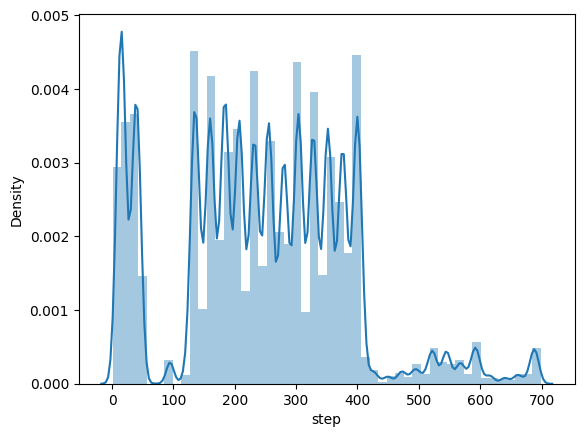

In [13]:
sns.distplot(data["step"], bins = 50)

In [ ]:
# Data Preprocessing

In [14]:
# converting "type" column from categorical dataset into numerical dataset
data["type"] = data["type"].map({
    "CASH_OUT" : 1,
    "PAYMENT" : 2,
    "CASH_IN" : 3,
    "TRANSFER" : 4,
    "DEBIT" : 5
})

In [15]:
# now converting is_fraud column from numerical dataset to categorical dataset
data["isFraud"] = data["isFraud"].map({
    0 : "No Fraud",
    1 : "Fraud"
})

In [16]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud


In [17]:
# Splitting the data into X(input) and y(output)
X = data.drop(columns = ["nameOrig", "nameDest", "isFraud"])
y = data["isFraud"]

In [18]:
X

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,2,9839.64,170136.00,160296.36,0.00,0.00
1,1,2,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,2,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6351188,699,4,162326.52,162326.52,0.00,0.00,0.00
6351189,699,1,162326.52,162326.52,0.00,0.00,162326.52
6351190,699,4,2763398.31,2763398.31,0.00,0.00,0.00
6351191,699,1,2763398.31,2763398.31,0.00,339515.35,3102913.66


In [19]:
y

0          No Fraud
1          No Fraud
2             Fraud
3             Fraud
4          No Fraud
             ...   
6351188       Fraud
6351189       Fraud
6351190       Fraud
6351191       Fraud
6351192    No Fraud
Name: isFraud, Length: 6351193, dtype: object

In [20]:
# splitting the data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
X_train

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
4683437,331,3,84991.73,222845.00,307836.73,7662313.92,7577322.19
1777787,162,1,298450.52,0.00,0.00,403828.00,603000.66
3050911,234,2,8942.15,0.00,0.00,0.00,0.00
4488840,324,2,31881.70,29510.00,0.00,0.00,0.00
1266953,135,2,6611.73,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
1570006,155,3,129715.85,5054252.83,5183968.68,246692.94,116977.09
2234489,186,2,2459.70,0.00,0.00,0.00,0.00
4926484,350,1,10579.16,59279.00,48699.84,322754.16,333333.32
4304572,307,1,73020.76,20289.00,0.00,256102.84,329123.61


In [22]:
y_train

4683437    No Fraud
1777787    No Fraud
3050911    No Fraud
4488840    No Fraud
1266953    No Fraud
             ...   
1570006    No Fraud
2234489    No Fraud
4926484    No Fraud
4304572    No Fraud
1692743    No Fraud
Name: isFraud, Length: 5080954, dtype: object

In [23]:
X_test

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
4351982,309,4,222429.32,79376.00,0.00,1412.31,223841.64
4763444,334,4,5578.26,0.00,0.00,23886.07,29464.33
947294,44,2,10905.95,4076.00,0.00,0.00,0.00
5679859,397,3,79695.49,181767.00,261462.49,94434.96,14739.47
515655,20,3,96605.03,3277719.30,3374324.33,1210651.86,1114046.82
...,...,...,...,...,...,...,...
3049437,234,1,506119.75,25640.00,0.00,435825.02,941944.77
5732368,399,2,17011.21,0.00,0.00,0.00,0.00
303417,15,3,161719.43,2150211.34,2311930.76,6615201.22,6453481.80
2519590,205,2,1480.17,22418.56,20938.40,0.00,0.00


In [24]:
y_test

4351982    No Fraud
4763444    No Fraud
947294     No Fraud
5679859    No Fraud
515655     No Fraud
             ...   
3049437    No Fraud
5732368    No Fraud
303417     No Fraud
2519590    No Fraud
3455639    No Fraud
Name: isFraud, Length: 1270239, dtype: object

In [25]:
# training the model using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dtc.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9996984819392256

# Prediction

In [28]:
# prediction
# input = [step, type, amount, oldbalanceOrig, newbalanceOrig, oldbalanceDest, newbalanceDest]
input = pd.DataFrame([[331, 3, 84991.73, 222845.00, 307836.73, 7662313.92, 7577322.19]], columns = X_train.columns)
prediction = dtc.predict(input)
print(prediction)

['No Fraud']


In [ ]:
# By  applying OneHotEncoding on Nominal dataset in "type" column in data preprocessing

In [29]:
df = pd.read_csv("Online payment fraud detection dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [30]:
# data preprocessing
type_new = pd.get_dummies(df['type'], drop_first=True)
new_data = pd.concat([df, type_new], axis=1)
new_data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,False,False,True,False


In [31]:
# splitting the data into X(input) and y(output)
X = new_data.drop(columns = ["type", "nameOrig", "nameDest", "isFraud"], axis = 1)
y = new_data["isFraud"]

In [32]:
X

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
6351188,699,162326.52,162326.52,0.00,0.00,0.00,False,False,False,True
6351189,699,162326.52,162326.52,0.00,0.00,162326.52,True,False,False,False
6351190,699,2763398.31,2763398.31,0.00,0.00,0.00,False,False,False,True
6351191,699,2763398.31,2763398.31,0.00,339515.35,3102913.66,True,False,False,False


In [33]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6351188    1
6351189    1
6351190    1
6351191    1
6351192    0
Name: isFraud, Length: 6351193, dtype: int64

In [34]:
# splitting the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
X_train

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4683437,331,84991.73,222845.00,307836.73,7662313.92,7577322.19,False,False,False,False
1777787,162,298450.52,0.00,0.00,403828.00,603000.66,True,False,False,False
3050911,234,8942.15,0.00,0.00,0.00,0.00,False,False,True,False
4488840,324,31881.70,29510.00,0.00,0.00,0.00,False,False,True,False
1266953,135,6611.73,0.00,0.00,0.00,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1570006,155,129715.85,5054252.83,5183968.68,246692.94,116977.09,False,False,False,False
2234489,186,2459.70,0.00,0.00,0.00,0.00,False,False,True,False
4926484,350,10579.16,59279.00,48699.84,322754.16,333333.32,True,False,False,False
4304572,307,73020.76,20289.00,0.00,256102.84,329123.61,True,False,False,False


In [36]:
y_train

4683437    0
1777787    0
3050911    0
4488840    0
1266953    0
          ..
1570006    0
2234489    0
4926484    0
4304572    0
1692743    0
Name: isFraud, Length: 5080954, dtype: int64

In [37]:
X_test

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4351982,309,222429.32,79376.00,0.00,1412.31,223841.64,False,False,False,True
4763444,334,5578.26,0.00,0.00,23886.07,29464.33,False,False,False,True
947294,44,10905.95,4076.00,0.00,0.00,0.00,False,False,True,False
5679859,397,79695.49,181767.00,261462.49,94434.96,14739.47,False,False,False,False
515655,20,96605.03,3277719.30,3374324.33,1210651.86,1114046.82,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3049437,234,506119.75,25640.00,0.00,435825.02,941944.77,True,False,False,False
5732368,399,17011.21,0.00,0.00,0.00,0.00,False,False,True,False
303417,15,161719.43,2150211.34,2311930.76,6615201.22,6453481.80,False,False,False,False
2519590,205,1480.17,22418.56,20938.40,0.00,0.00,False,False,True,False


In [38]:
y_test

4351982    0
4763444    0
947294     0
5679859    0
515655     0
          ..
3049437    0
5732368    0
303417     0
2519590    0
3455639    0
Name: isFraud, Length: 1270239, dtype: int64

In [39]:
# training the model using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
dtc1.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
#Accuracy scoer of model
y_pred1 = dtc1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy Score of Model is :", acc1)

Accuracy Score of Model is : 0.9997071417268719


# Prediction

In [42]:
# input = [step, amount, oldbalanceOrig, newbalanceOrig, oldbalanceDest, newbalanceDest, CASH_OUT, DEBIT, PAYMENT, TRANSFER]
input = pd.DataFrame([[234, 506119.75, 25640.00, 0.00, 435825.02, 941944.77, True, False, False, False]], columns = X_train.columns)
prediction = dtc1.predict(input)
if prediction == 0:
    print("No Fraud")
else:
    print("Fraud")

No Fraud
